# Problem statement
This is week 4 of Kaggle's COVID19 forecasting series.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from datetime import timedelta
from sklearn.linear_model import LinearRegression

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-4/submission.csv
/kaggle/input/covid19-global-forecasting-week-4/test.csv
/kaggle/input/covid19-global-forecasting-week-4/train.csv


In [2]:
N = 5 # Number of previous data points to use to forecast

# Common functions

In [3]:
def get_preds_lin_reg(series, pred_min, H):
    """
    Given a dataframe, get prediction at timestep t using values from t-1, t-2, ..., t-N.
    Inputs
        series     : series to forecast
        pred_min   : all predictions should be >= pred_min
        H          : forecast horizon
    Outputs
        result: the predictions. The length of result is H. numpy array of shape (H,)
    """
    # Create linear regression object
    regr = LinearRegression(fit_intercept=True)

    pred_list = []

    X_train = np.array(range(len(series))) # e.g. [0 1 2 3 4]
    y_train = np.array(series) # e.g. [2944 3088 3226 3335 3436]
    X_train = X_train.reshape(-1, 1)     # e.g X_train = 
                                             # [[0]
                                             #  [1]
                                             #  [2]
                                             #  [3]
                                             #  [4]]
    # X_train = np.c_[np.ones(N), X_train]              # add a column
    y_train = y_train.reshape(-1, 1)
    regr.fit(X_train, y_train)            # Train the model
    pred = regr.predict(np.array(range(len(series),len(series)+H)).reshape(-1,1))
    pred = pred.reshape(H,)
    
    # If the values are < pred_min, set it to be pred_min
    pred[pred < pred_min] = pred_min
        
    return np.around(pred)

# Load data

In [4]:
train = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/train.csv')

# Change column names to lower case
train.columns = [col.lower() for col in train.columns]

# Change to date format
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')

train

,id,province_state,country_region,date,confirmedcases,fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
26287,35648,NaN,Zimbabwe,2020-04-10,13.0,3.0
26288,35649,NaN,Zimbabwe,2020-04-11,14.0,3.0
26289,35650,NaN,Zimbabwe,2020-04-12,14.0,3.0
26290,35651,NaN,Zimbabwe,2020-04-13,17.0,3.0


In [5]:
test = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/test.csv')

# Change column names to lower case
test.columns = [col.lower() for col in test.columns]

# Change to date format
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')

test

,forecastid,province_state,country_region,date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06
...,...,...,...,...
13454,13455,NaN,Zimbabwe,2020-05-10
13455,13456,NaN,Zimbabwe,2020-05-11
13456,13457,NaN,Zimbabwe,2020-05-12
13457,13458,NaN,Zimbabwe,2020-05-13


In [6]:
submission = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/submission.csv')
submission

,ForecastId,ConfirmedCases,Fatalities
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1
...,...,...,...
13454,13455,1,1
13455,13456,1,1
13456,13457,1,1
13457,13458,1,1


# EDA

In [7]:
# Count number of nulls for each column
train.isnull().sum(axis=0)

id                    0
province_state    15120
country_region        0
date                  0
confirmedcases        0
fatalities            0
dtype: int64

In [8]:
# Get the province_states
print(len(train['province_state'].unique()))
train['province_state'].unique()

134


array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Northwest Territories', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Martinique',
       'Mayotte', 'New Caledonia', 'Reunion', 'Saint Barthelemy',
       'Saint Pierre and Miqu

In [9]:
# Get the country_regions
print(len(train['country_region'].unique()))
train['country_region'].unique()

184


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [10]:
# Get amount of data per country
train['country_region'].value_counts()

US                4536
China             2772
Canada            1008
United Kingdom     924
France             924
                  ... 
Hungary             84
Liberia             84
Uruguay             84
Tanzania            84
Philippines         84
Name: country_region, Length: 184, dtype: int64

Different country_regions have different amount of data

In [11]:
train[train['country_region']=='Singapore']

,id,province_state,country_region,date,confirmedcases,fatalities
18144,24625,NaN,Singapore,2020-01-22,0.0,0.0
18145,24626,NaN,Singapore,2020-01-23,1.0,0.0
18146,24627,NaN,Singapore,2020-01-24,3.0,0.0
18147,24628,NaN,Singapore,2020-01-25,3.0,0.0
18148,24629,NaN,Singapore,2020-01-26,4.0,0.0
...,...,...,...,...,...,...
18223,24704,NaN,Singapore,2020-04-10,2108.0,7.0
18224,24705,NaN,Singapore,2020-04-11,2299.0,8.0
18225,24706,NaN,Singapore,2020-04-12,2532.0,8.0
18226,24707,NaN,Singapore,2020-04-13,2918.0,9.0


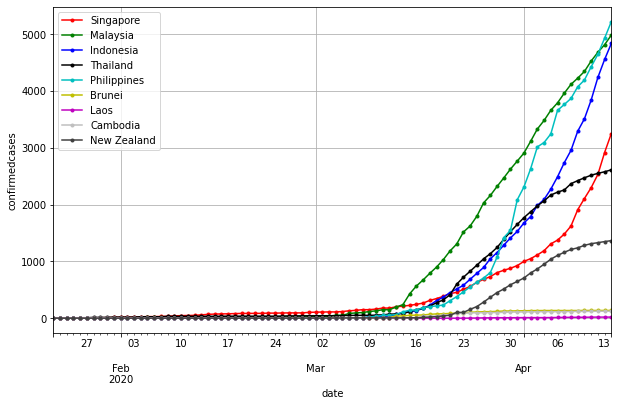

In [12]:
# Plot the confirmed cases in Singapore, Malaysia, Indonesia, Thailand
countries_list = ['Singapore', 'Malaysia', 'Indonesia', 'Thailand', 'Philippines', 'Brunei', 'Laos', 'Cambodia', 'New Zealand']
color_list = ['r', 'g', 'b', 'k', 'c', 'y', 'm', '0.75', '0.25']

ax = train[train['country_region']==countries_list[0]].plot(x='date', y='confirmedcases', style = 'r.-', grid=True, figsize=(10, 6))

i = 1
for country in countries_list[1:]:
    ax = train[train['country_region']==country].plot(x='date', y='confirmedcases', color=color_list[i], marker='.', grid=True, ax=ax, figsize=(10, 6))
    i = i + 1
    
ax.set_xlabel("date")
ax.set_ylabel("confirmedcases")
ax.legend(countries_list)

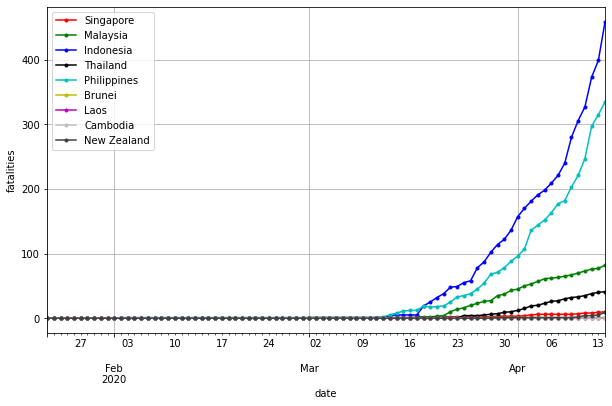

In [13]:
# Plot the fatalities in Singapore, Malaysia, Indonesia, Thailand
ax = train[train['country_region']==countries_list[0]].plot(x='date', y='fatalities', style = 'r.-', grid=True, figsize=(10, 6))

i = 1
for country in countries_list[1:]:
    ax = train[train['country_region']==country].plot(x='date', y='fatalities', color=color_list[i], marker='.', grid=True, ax=ax, figsize=(10, 6))
    i = i + 1
    
ax.set_xlabel("date")
ax.set_ylabel("fatalities")
ax.legend(countries_list)

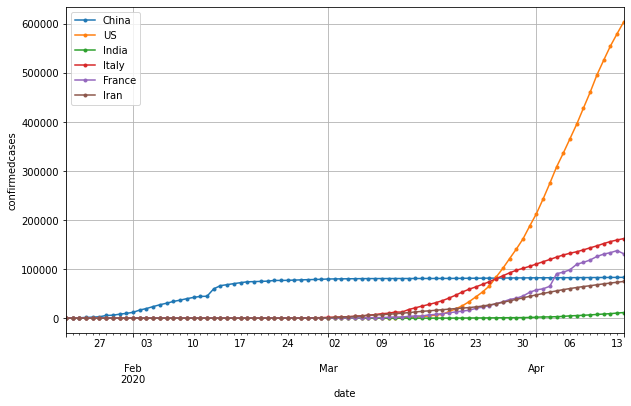

In [14]:
# Plot the confirmed cases in China, US, India
ax = train[train['country_region']=='China'].groupby("date").agg({"confirmedcases": "sum"}).plot(marker='.', figsize=(10, 6), grid=True)
ax = train[train['country_region']=='US'].groupby("date").agg({"confirmedcases": "sum"}).plot(marker='.', figsize=(10, 6), grid=True, ax=ax)
ax = train[train['country_region']=='India'].groupby("date").agg({"confirmedcases": "sum"}).plot(marker='.', figsize=(10, 6), grid=True, ax=ax)
ax = train[train['country_region']=='Italy'].groupby("date").agg({"confirmedcases": "sum"}).plot(marker='.', figsize=(10, 6), grid=True, ax=ax)
ax = train[train['country_region']=='France'].groupby("date").agg({"confirmedcases": "sum"}).plot(marker='.', figsize=(10, 6), grid=True, ax=ax)
ax = train[train['country_region']=='Iran'].groupby("date").agg({"confirmedcases": "sum"}).plot(marker='.', figsize=(10, 6), grid=True, ax=ax)

ax.set_xlabel("date")
ax.set_ylabel("confirmedcases")
ax.legend(['China', 'US', 'India', 'Italy', 'France', 'Iran'])

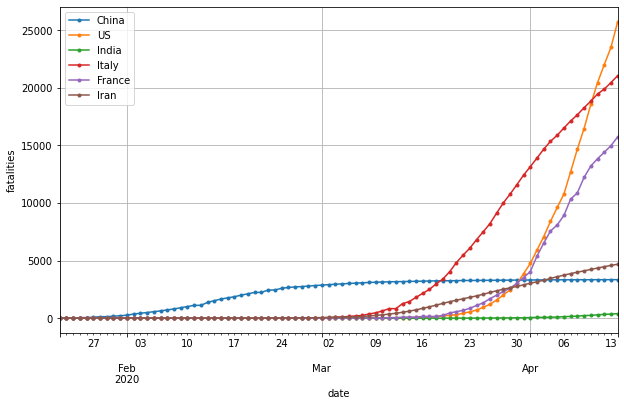

In [15]:
# Plot the fatalities in China, US, India
ax = train[train['country_region']=='China'].groupby("date").agg({"fatalities": "sum"}).plot(marker='.', figsize=(10, 6), grid=True)
ax = train[train['country_region']=='US'].groupby("date").agg({"fatalities": "sum"}).plot(marker='.', figsize=(10, 6), grid=True, ax=ax)
ax = train[train['country_region']=='India'].groupby("date").agg({"fatalities": "sum"}).plot(marker='.', figsize=(10, 6), grid=True, ax=ax)
ax = train[train['country_region']=='Italy'].groupby("date").agg({"fatalities": "sum"}).plot(marker='.', figsize=(10, 6), grid=True, ax=ax)
ax = train[train['country_region']=='France'].groupby("date").agg({"fatalities": "sum"}).plot(marker='.', figsize=(10, 6), grid=True, ax=ax)
ax = train[train['country_region']=='Iran'].groupby("date").agg({"fatalities": "sum"}).plot(marker='.', figsize=(10, 6), grid=True, ax=ax)

ax.set_xlabel("date")
ax.set_ylabel("fatalities")
ax.legend(['China', 'US', 'India', 'Italy', 'France', 'Iran'])

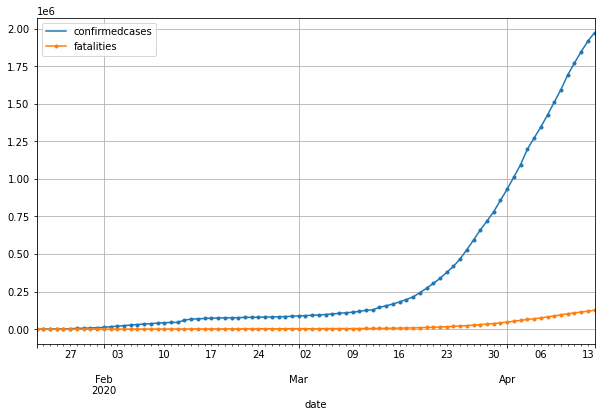

In [16]:
# Get global number of cases
ax = train.groupby("date").agg({"confirmedcases": "sum"}).plot(marker='.', figsize=(10, 6), grid=True)
train.groupby("date").agg({"fatalities": "sum"}).plot(marker='.', figsize=(10, 6), grid=True, ax=ax)

# Pre-process train, test

In [17]:
# Fill nans in province_state with ''
train['province_state'] = train['province_state'].fillna(value = 'nil')
train.head()

,id,province_state,country_region,date,confirmedcases,fatalities
0,1,nil,Afghanistan,2020-01-22,0.0,0.0
1,2,nil,Afghanistan,2020-01-23,0.0,0.0
2,3,nil,Afghanistan,2020-01-24,0.0,0.0
3,4,nil,Afghanistan,2020-01-25,0.0,0.0
4,5,nil,Afghanistan,2020-01-26,0.0,0.0


In [18]:
# Fill nans in province_state with ''
test['province_state'] = test['province_state'].fillna(value = 'nil')
test.head()

,forecastid,province_state,country_region,date
0,1,nil,Afghanistan,2020-04-02
1,2,nil,Afghanistan,2020-04-03
2,3,nil,Afghanistan,2020-04-04
3,4,nil,Afghanistan,2020-04-05
4,5,nil,Afghanistan,2020-04-06


In [19]:
# Get unique combinations of province_state and country_region
ps_cr_unique = train[['province_state', 'country_region']].drop_duplicates()
ps_cr_unique

,province_state,country_region
0,nil,Afghanistan
84,nil,Albania
168,nil,Algeria
252,nil,Andorra
336,nil,Angola
...,...,...
25872,nil,Vietnam
25956,nil,West Bank and Gaza
26040,nil,Western Sahara
26124,nil,Zambia


In [20]:
# Get number of days we need to predict
date_max_train = train[(train['province_state']=='nil') & 
                 (train['country_region']=='Singapore')]['date'].max()

date_max_test = test[(test['province_state']=='nil') & 
                 (test['country_region']=='Singapore')]['date'].max()

pred_days = (date_max_test - date_max_train).days
print(date_max_train, date_max_test, pred_days)

2020-04-14 00:00:00 2020-05-14 00:00:00 30


# Prediction for one country

In [21]:
# Specify the country here
ps = 'nil'
cr = 'Singapore'

In [22]:
train_sgp = train[(train['province_state']==ps) & (train['country_region']==cr)]
train_sgp[-5:]

,id,province_state,country_region,date,confirmedcases,fatalities
18223,24704,nil,Singapore,2020-04-10,2108.0,7.0
18224,24705,nil,Singapore,2020-04-11,2299.0,8.0
18225,24706,nil,Singapore,2020-04-12,2532.0,8.0
18226,24707,nil,Singapore,2020-04-13,2918.0,9.0
18227,24708,nil,Singapore,2020-04-14,3252.0,10.0


In [23]:
# Get predictions 
preds = get_preds_lin_reg(train_sgp['confirmedcases'][-N:], 0, pred_days)
preds

array([ 3494.,  3785.,  4075.,  4366.,  4657.,  4947.,  5238.,  5529.,
        5819.,  6110.,  6401.,  6692.,  6982.,  7273.,  7564.,  7854.,
        8145.,  8436.,  8726.,  9017.,  9308.,  9599.,  9889., 10180.,
       10471., 10761., 11052., 11343., 11633., 11924.])

In [24]:
# Put into dataframe
date_list = []
date = pd.date_range(date_max_train+timedelta(days=1), date_max_test)
results = pd.DataFrame({'date': date, 'preds':preds})
results.head()

,date,preds
0,2020-04-15,3494.0
1,2020-04-16,3785.0
2,2020-04-17,4075.0
3,2020-04-18,4366.0
4,2020-04-19,4657.0


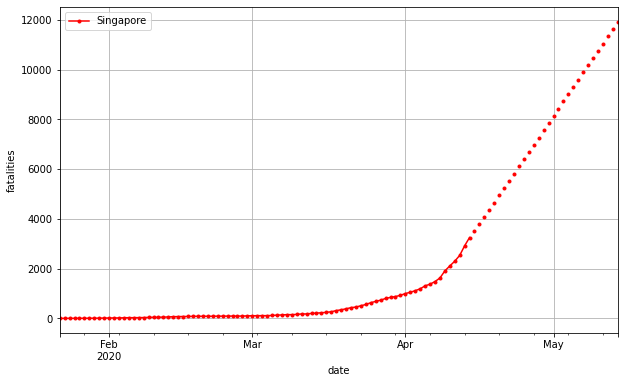

In [25]:
# Plot the confirmed cases in Singapore and the predictions
ax = train[train['country_region']==cr].plot(x='date', y='confirmedcases', style = 'r.-', grid=True, figsize=(10, 6))
ax = results.plot(x='date', y='preds', style = 'r.', grid=True, figsize=(10, 6), ax=ax)
    

ax.set_xlabel("date")
ax.set_ylabel("fatalities")
ax.legend([cr])

# Predictions for confirmedcases

In [26]:
# Predict for confirmedcases
ps_list = []
cr_list = []
date_list = []
confirmedcasespred_list = []

for index, row in ps_cr_unique.iterrows():
    train_temp = train[(train['province_state']==row['province_state']) & (train['country_region']==row['country_region'])]
    preds = get_preds_lin_reg(train_temp['confirmedcases'][-N:], 0, pred_days)
    
    ps_list = ps_list + ([row['province_state']]*pred_days)
    cr_list = cr_list + ([row['country_region']]*pred_days)
    date_list = date_list + list(pd.date_range(date_max_train+timedelta(days=1), date_max_test).strftime("%Y-%m-%d"))
    confirmedcasespred_list = confirmedcasespred_list + list(preds)

results = pd.DataFrame({'province_state': ps_list,
                        'country_region': cr_list,
                        'date': date_list,
                        'confirmedcases': confirmedcasespred_list})
results['date'] = pd.to_datetime(results['date'], format='%Y-%m-%d')
results

,province_state,country_region,date,confirmedcases
0,nil,Afghanistan,2020-04-15,761.0
1,nil,Afghanistan,2020-04-16,811.0
2,nil,Afghanistan,2020-04-17,860.0
3,nil,Afghanistan,2020-04-18,910.0
4,nil,Afghanistan,2020-04-19,960.0
...,...,...,...,...
9385,nil,Zimbabwe,2020-05-10,46.0
9386,nil,Zimbabwe,2020-05-11,47.0
9387,nil,Zimbabwe,2020-05-12,48.0
9388,nil,Zimbabwe,2020-05-13,49.0


In [27]:
# Merge test with the existing values in train
test_merged = test.merge(train[['province_state', 'country_region', 'date', 'confirmedcases', 'fatalities']], 
                         left_on=['province_state', 'country_region', 'date'], 
                         right_on=['province_state', 'country_region', 'date'], 
                         how='left') 
test_merged

,forecastid,province_state,country_region,date,confirmedcases,fatalities
0,1,nil,Afghanistan,2020-04-02,273.0,6.0
1,2,nil,Afghanistan,2020-04-03,281.0,6.0
2,3,nil,Afghanistan,2020-04-04,299.0,7.0
3,4,nil,Afghanistan,2020-04-05,349.0,7.0
4,5,nil,Afghanistan,2020-04-06,367.0,11.0
...,...,...,...,...,...,...
13454,13455,nil,Zimbabwe,2020-05-10,NaN,NaN
13455,13456,nil,Zimbabwe,2020-05-11,NaN,NaN
13456,13457,nil,Zimbabwe,2020-05-12,NaN,NaN
13457,13458,nil,Zimbabwe,2020-05-13,NaN,NaN


In [28]:
# Merge test with the predictions
test_merged2 = test_merged.merge(results, 
                                left_on=['province_state', 'country_region', 'date'], 
                                right_on=['province_state', 'country_region', 'date'], 
                                how='left') 
test_merged2

,forecastid,province_state,country_region,date,confirmedcases_x,fatalities,confirmedcases_y
0,1,nil,Afghanistan,2020-04-02,273.0,6.0,NaN
1,2,nil,Afghanistan,2020-04-03,281.0,6.0,NaN
2,3,nil,Afghanistan,2020-04-04,299.0,7.0,NaN
3,4,nil,Afghanistan,2020-04-05,349.0,7.0,NaN
4,5,nil,Afghanistan,2020-04-06,367.0,11.0,NaN
...,...,...,...,...,...,...,...
13454,13455,nil,Zimbabwe,2020-05-10,NaN,NaN,46.0
13455,13456,nil,Zimbabwe,2020-05-11,NaN,NaN,47.0
13456,13457,nil,Zimbabwe,2020-05-12,NaN,NaN,48.0
13457,13458,nil,Zimbabwe,2020-05-13,NaN,NaN,49.0


In [29]:
# Create column confirmedcases
test_merged2['confirmedcases'] = test_merged2.apply(lambda row: row['confirmedcases_x'] if pd.isnull(row['confirmedcases_y']) else row['confirmedcases_y'], axis=1)
test_merged2.drop(['confirmedcases_x', 'confirmedcases_y'], axis=1, inplace=True)
test_merged2

,forecastid,province_state,country_region,date,fatalities,confirmedcases
0,1,nil,Afghanistan,2020-04-02,6.0,273.0
1,2,nil,Afghanistan,2020-04-03,6.0,281.0
2,3,nil,Afghanistan,2020-04-04,7.0,299.0
3,4,nil,Afghanistan,2020-04-05,7.0,349.0
4,5,nil,Afghanistan,2020-04-06,11.0,367.0
...,...,...,...,...,...,...
13454,13455,nil,Zimbabwe,2020-05-10,NaN,46.0
13455,13456,nil,Zimbabwe,2020-05-11,NaN,47.0
13456,13457,nil,Zimbabwe,2020-05-12,NaN,48.0
13457,13458,nil,Zimbabwe,2020-05-13,NaN,49.0


# Predictions for fatalities

In [30]:
# Predict for fatalities
ps_list = []
cr_list = []
date_list = []
fatalities_list = []

for index, row in ps_cr_unique.iterrows():
    train_temp = train[(train['province_state']==row['province_state']) & (train['country_region']==row['country_region'])]
    preds = get_preds_lin_reg(train_temp['fatalities'][-N:], 0, pred_days)
    
    ps_list = ps_list + ([row['province_state']]*pred_days)
    cr_list = cr_list + ([row['country_region']]*pred_days)
    date_list = date_list + list(pd.date_range(date_max_train+timedelta(days=1), date_max_test).strftime("%Y-%m-%d"))
    fatalities_list = fatalities_list + list(preds)

results = pd.DataFrame({'province_state': ps_list,
                        'country_region': cr_list,
                        'date': date_list,
                        'fatalities': fatalities_list})
results['date'] = pd.to_datetime(results['date'], format='%Y-%m-%d')
results

,province_state,country_region,date,fatalities
0,nil,Afghanistan,2020-04-15,25.0
1,nil,Afghanistan,2020-04-16,27.0
2,nil,Afghanistan,2020-04-17,28.0
3,nil,Afghanistan,2020-04-18,30.0
4,nil,Afghanistan,2020-04-19,32.0
...,...,...,...,...
9385,nil,Zimbabwe,2020-05-10,3.0
9386,nil,Zimbabwe,2020-05-11,3.0
9387,nil,Zimbabwe,2020-05-12,3.0
9388,nil,Zimbabwe,2020-05-13,3.0


In [31]:
# Merge with the predictions
test_merged3 = test_merged2.merge(results, 
                                left_on=['province_state', 'country_region', 'date'], 
                                right_on=['province_state', 'country_region', 'date'], 
                                how='left') 
test_merged3

,forecastid,province_state,country_region,date,fatalities_x,confirmedcases,fatalities_y
0,1,nil,Afghanistan,2020-04-02,6.0,273.0,NaN
1,2,nil,Afghanistan,2020-04-03,6.0,281.0,NaN
2,3,nil,Afghanistan,2020-04-04,7.0,299.0,NaN
3,4,nil,Afghanistan,2020-04-05,7.0,349.0,NaN
4,5,nil,Afghanistan,2020-04-06,11.0,367.0,NaN
...,...,...,...,...,...,...,...
13454,13455,nil,Zimbabwe,2020-05-10,NaN,46.0,3.0
13455,13456,nil,Zimbabwe,2020-05-11,NaN,47.0,3.0
13456,13457,nil,Zimbabwe,2020-05-12,NaN,48.0,3.0
13457,13458,nil,Zimbabwe,2020-05-13,NaN,49.0,3.0


In [32]:
# Create column fatalities
test_merged3['fatalities'] = test_merged3.apply(lambda row: row['fatalities_x'] if pd.isnull(row['fatalities_y']) else row['fatalities_y'], axis=1)
test_merged3.drop(['fatalities_x', 'fatalities_y'], axis=1, inplace=True)
test_merged3

,forecastid,province_state,country_region,date,confirmedcases,fatalities
0,1,nil,Afghanistan,2020-04-02,273.0,6.0
1,2,nil,Afghanistan,2020-04-03,281.0,6.0
2,3,nil,Afghanistan,2020-04-04,299.0,7.0
3,4,nil,Afghanistan,2020-04-05,349.0,7.0
4,5,nil,Afghanistan,2020-04-06,367.0,11.0
...,...,...,...,...,...,...
13454,13455,nil,Zimbabwe,2020-05-10,46.0,3.0
13455,13456,nil,Zimbabwe,2020-05-11,47.0,3.0
13456,13457,nil,Zimbabwe,2020-05-12,48.0,3.0
13457,13458,nil,Zimbabwe,2020-05-13,49.0,3.0


# Prepare submission file

In [33]:
# Form the submission dataset
submission = test_merged3.copy()
submission.drop(['country_region', 'province_state', 'date'], axis=1, inplace=True)
submission.rename(columns={'forecastid': 'ForecastId',
                           'fatalities': 'Fatalities', 
                           'confirmedcases': 'ConfirmedCases'}, inplace=True)
submission

,ForecastId,ConfirmedCases,Fatalities
0,1,273.0,6.0
1,2,281.0,6.0
2,3,299.0,7.0
3,4,349.0,7.0
4,5,367.0,11.0
...,...,...,...
13454,13455,46.0,3.0
13455,13456,47.0,3.0
13456,13457,48.0,3.0
13457,13458,49.0,3.0


In [34]:
# Test submission
submission.to_csv("submission.csv", index=False)